In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display
from enhancement_analysis import *
from fit_functions import *

%matplotlib inline

In [2]:
folder = '20190228'

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

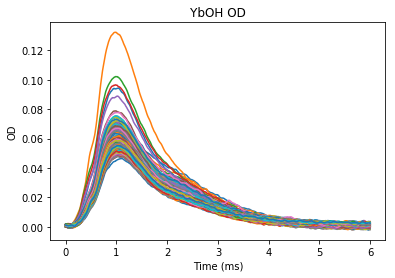

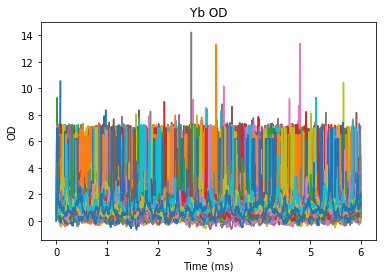

In [30]:
# All Yb light blocked

start = 0
stop = 200
skips = []

dataset = calculateSeriesODFromRaw(folder,start,stop,skips)
YbOH,Yb,times = processScan(dataset,start_stop=[0,6])

In [31]:
times_all = [times]
YbOH_all = [YbOH]
labels_all = ['0 to 200']


 201 to 866


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 867 to 1379


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 1380 to 2095


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)


 2096 to 3369


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

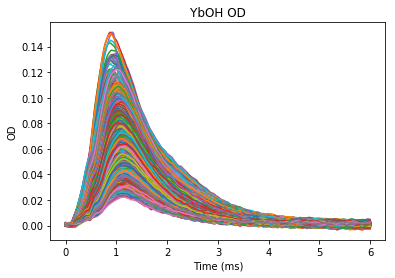

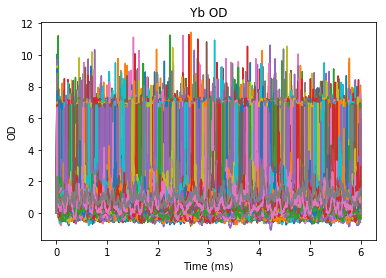

In [32]:
start_files=[201,867,1380,2096]
stop_files=[866,1379,2095,3369]
labels=['201 to 866','867 to 1379','1380 to 2095','2096 to 3369']
skips = []
         
for _start,_stop,_label in zip(start_files,stop_files,labels):
    print('\n',_label)
    if _start == 867:
        skips = [1192]
    else:
        skips = []
    dataset = calculateSeriesODFromRaw(folder,_start,_stop,skips)
    YbOH,Yb,times = processScan(dataset,start_stop=[0,6])
    times_all.append(times)
    YbOH_all.append(YbOH)
    labels_all.append(_label)

In [34]:
YbOH_save = YbOH_all
times_save = times_all
YbOH_container = []
time_container = []
for i in range(len(YbOH_all)):
    if i==0:
        x = YbOH_all[i]+YbOH_all[i+1]
        y = times_all[i]+list(np.array(times_all[i+1])+times_all[i][-1])
        YbOH_container.append(np.array(x))
        time_container.append(np.array(y))
    elif i==1:
        pass
    else:
        YbOH_container.append(np.array(YbOH_all[i]))
        time_container.append(np.array(times_all[i]))
        
YbOH_all = YbOH_container
times_all = time_container
_labels = labels_all[2:]
labels_all = ['0 to 866',_labels]

In [37]:
writeCSVrows(YbOH_all,'Processed_20190228/YbOH_integrated.csv')
writeCSVrows(times_all,'Processed_20190228/times.csv')
writeCSVrows(labels_all,'Processed_20190228/row_labels.csv')

Done! Array written to Processed_20190228/YbOH_integrated.csv
Done! Array written to Processed_20190228/times.csv
Done! Array written to Processed_20190228/row_labels.csv


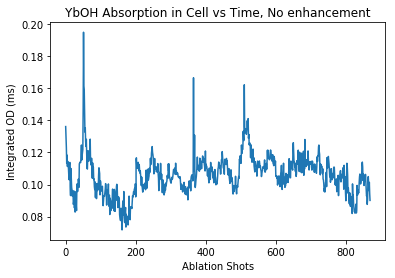

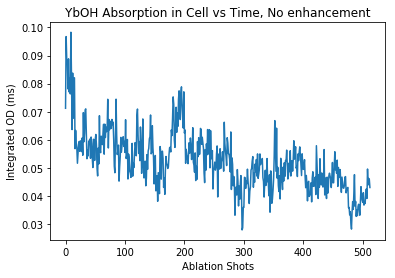

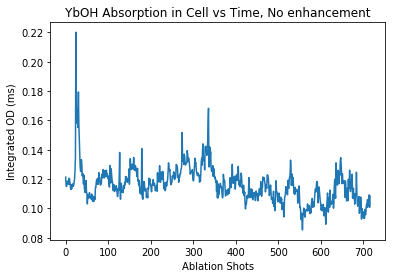

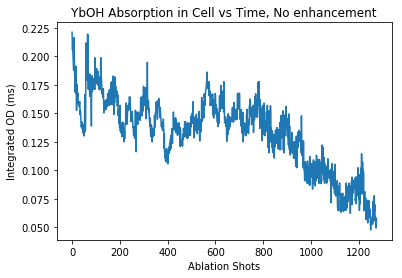

In [39]:
for _YbOH,_time in zip(YbOH_all,times_all):
    plt.figure()
    plt.title('YbOH Absorption in Cell vs Time, No enhancement')
    plt.ylabel('Integrated OD (ms)')
    plt.xlabel('Ablation Shots')
    plt.plot(np.array(_time)*1.427,_YbOH)

In [36]:
len(YbOH_all)

4